# Dimensionality reducion on MNIST digit data

In [1]:
# %pip install python-mnist
%matplotlib inline

import time
import sys
import tensorflow as tf
from keras.datasets import mnist
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)


In [2]:
# Load the data

(X_train,y_train),(X_test,y_test) = mnist.load_data()
print("Train data")
print(f"X Train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print("*"*100)
print("Test data")
print(f"X Test: {X_test.shape}")
print(f"Y Text: {y_test.shape}")


11490434/11490434 [==============================] - 3s 0us/step
Train data
X Train: (60000, 28, 28)
y train: (60000,)
****************************************************************************************************
Test data
X Test: (10000, 28, 28)
Y Text: (10000,)


From the data above, we can already tell a few things
<li>The Train and test data has 60000 and 10000 images respectively</li>
<li>The images have a dimention of 28 by 28 pixels</li>

#### join the datasets

In [3]:
X_data = np.vstack((X_train, X_test))
print("X data: {} ".format(X_data.shape))

Y_data = np.hstack((y_train, y_test))
print("Y data: {} ".format(Y_data.shape))

X data: (70000, 28, 28) 
Y data: (70000,) 


In [4]:
print(type(Y_data))

<class 'numpy.ndarray'>


We have numpy arrays of X_data and Y_data

### Plotting the images

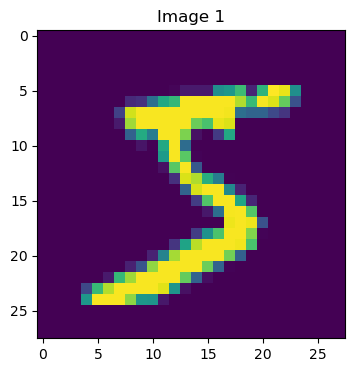

In [5]:
# Plot the first image on the data without alteing the colour

fig = plt.figure(figsize=(4,4))

plt.title("Image 1")
plt.imshow(X_data[0])
plt.show()

# display(X_train)

The above images show that the digit images are in <strong>RGB colour channels</strong> and we need to turn them into grayscale
<br>


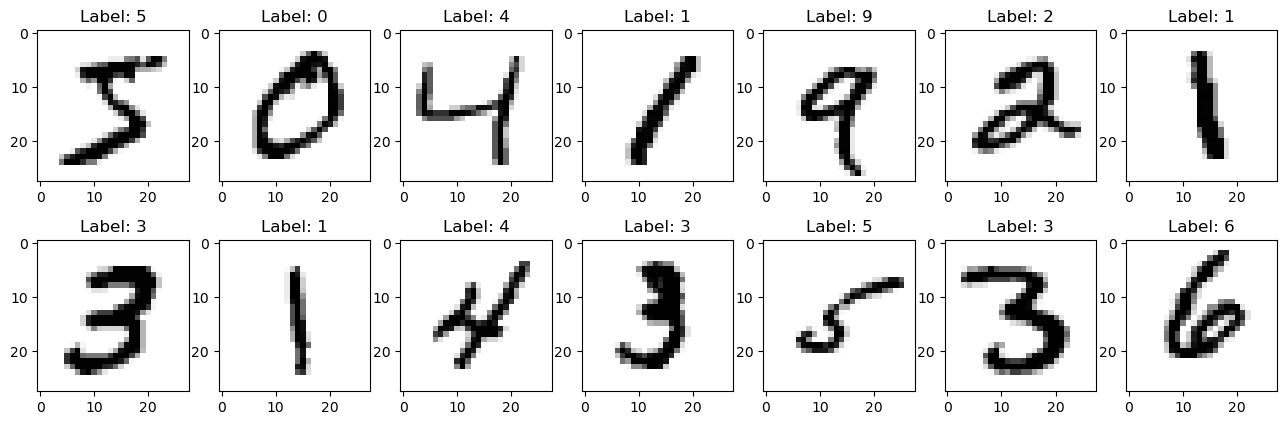

In [6]:
#  We can go further to plot the first few images

images = X_data[0:14]
labels = Y_data[0:14]
fig,axes = plt.subplots(2,7, figsize = (16,5))

for img in range(14):
    ax = axes[img//7, img%7]
    ax.imshow(images[img], cmap=plt.cm.binary) # we show the digits in a binary colour
    ax.set_title("Label: {}".format(labels[img]))
plt.tight_layout
plt.show()

In [7]:
# Lets see how the colour digits are distributed on the first image on the data.
for i in X_data[1]:
    print(i.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 159, 253, 159, 50, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 48, 238, 252, 252, 252, 237, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 54, 227, 253, 252, 239, 233, 252, 57, 6, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 60, 224, 252, 253, 252, 202, 84, 252, 253, 122, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 163, 252, 252, 252, 253, 252, 252, 96, 189, 253, 167, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 238, 253, 253, 190, 114, 253, 228, 47, 79, 255, 168, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 48, 238, 252, 252, 179, 12, 

We can clearly seee that this is number 0

### Reashaping

Since we are interesed in dimentionality reduction, <br>we will need to reshape the data arrays into a <strong>single colour channel</strong>

In [8]:
# Reshape the X_train and X_test

display(X_data.shape)
X_data = X_data.reshape((X_data.shape[0], 28,28,-1))


print(f"After reshaping, X_data dim: {X_data.shape}")

(70000, 28, 28)

After reshaping, X_data dim: (70000, 28, 28, 1)


#### Transforming the data into High dimention
<li>Part 1: Use the 10 categories and see the result</li>
<li>Part 2: Use the 784 fratures <strong>28 X 28 </strong> and see the result</li>

### Part 1: Using the 10 categorical digits

In [9]:
# One hot encodding and representation
lr = np.arange(10)

for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


C:\Users\User\AppData\Local\Temp\ipykernel_2472\1880976826.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  one_hot = (lr==label).astype(np.int)


In [10]:
# Onehot encodding
encodded_data = pd.get_dummies(Y_data)
print(encodded_data)

       0  1  2  3  4  5  6  7  8  9
0      0  0  0  0  0  1  0  0  0  0
1      1  0  0  0  0  0  0  0  0  0
2      0  0  0  0  1  0  0  0  0  0
3      0  1  0  0  0  0  0  0  0  0
4      0  0  0  0  0  0  0  0  0  1
...   .. .. .. .. .. .. .. .. .. ..
69995  0  0  1  0  0  0  0  0  0  0
69996  0  0  0  1  0  0  0  0  0  0
69997  0  0  0  0  1  0  0  0  0  0
69998  0  0  0  0  0  1  0  0  0  0
69999  0  0  0  0  0  0  1  0  0  0

[70000 rows x 10 columns]


From the results above we can see that the encoded data shape after one hot encoding we get 10 categories. <br>
This is because the digits range from 0 -9 which are 10 10 categories

In [11]:
print(Y_data)
print('-'*20)
print(len(Y_data))

[5 0 4 ... 4 5 6]
--------------------
70000


In [12]:
# converting the y_data numpy array to a pandas dataframe with column label

Y_df = pd.DataFrame(Y_data, columns=['labels'])
Y_df

,labels
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


## Visualizaton using t-SNE

T-Dristribted Stochastic Neighbour Embedding (t-SNE) is a non linear dimentionality reduction techique that well suits vizualization of high dimension data especially on a 2D plot using conditional probalbility.<br>
t-SNE uses Gausian distribution

#### Converng data into a pandas dataframe for easier handling

In [13]:
# converting the one hot encoded data into a data frame and the concating labels 

enc_df = pd.DataFrame(encodded_data)
print(pd.concat([enc_df, Y_df], axis=1))

# print('-'*100)
# display(train_df.value_counts())

       0  1  2  3  4  5  6  7  8  9  labels
0      0  0  0  0  0  1  0  0  0  0       5
1      1  0  0  0  0  0  0  0  0  0       0
2      0  0  0  0  1  0  0  0  0  0       4
3      0  1  0  0  0  0  0  0  0  0       1
4      0  0  0  0  0  0  0  0  0  1       9
...   .. .. .. .. .. .. .. .. .. ..     ...
69995  0  0  1  0  0  0  0  0  0  0       2
69996  0  0  0  1  0  0  0  0  0  0       3
69997  0  0  0  0  1  0  0  0  0  0       4
69998  0  0  0  0  0  1  0  0  0  0       5
69999  0  0  0  0  0  0  1  0  0  0       6

[70000 rows x 11 columns]


In [14]:
# Function to compute t-SNE 

# def tSNE(dataframe):
start_time = time.time()
tsne = TSNE(n_components = 2, verbose=0, learning_rate=200, n_iter=500)
tsne_result = tsne.fit_transform(X=enc_df)
end_time = time.time()
print("Learning completed in {} seconds".format(end_time - start_time))

    # return tsne_result


Learning completed in 444.1323480606079 seconds


In [15]:
tsne_df1 = pd.DataFrame({"t-SNE 1":tsne_result[:,0], "t-SNE 2":tsne_result[:,1], "label":Y_df['labels']})
tsne_df1.head()

,t-SNE 1,t-SNE 2,label
0,-8.668647,-4.061923,5
1,-8.526727,3.446919,0
2,0.750661,-4.851017,4
3,1.584338,2.103454,1
4,8.974578,1.635653,9


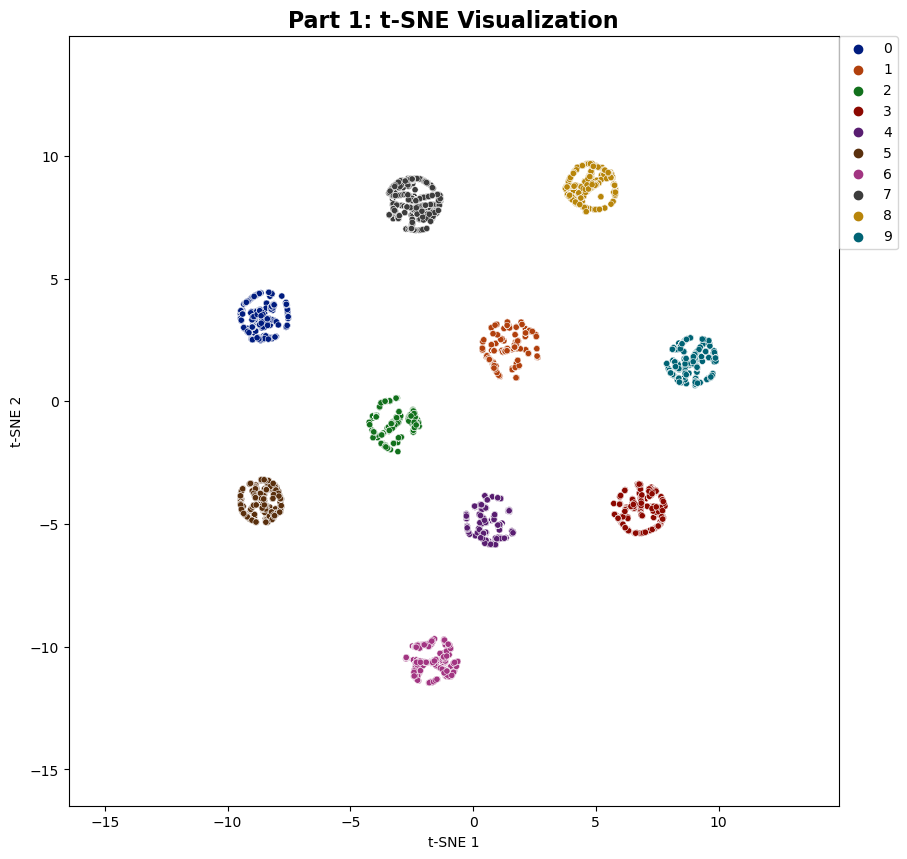

In [16]:
# Plotting the tsne data

fig, ax = plt.subplots(1, figsize=(15,10))
sns.scatterplot(x = 't-SNE 1', y= 't-SNE 2', hue = 'label', data = tsne_df1, ax = ax, s=20, palette = 'dark')
sns.color_palette("hls", 10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.set_title('Part 1: t-SNE Visualization', fontsize = 16, weight = 'bold')
ax.legend(bbox_to_anchor = (1,1), loc =2, borderaxespad = 0.0)

### Part 2: Using the 784 features

In [17]:
# Flattening the array from 2D to 1D

X_data2 = []
for i in range(len(X_data)):
    X_data2.append(X_data[i].flatten())


In [18]:
# Convering into a dataframe

X_data2 = pd.DataFrame(X_data2, columns = [str(i) for i in range(28*28)])
X_data2.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:

start_time = time.time()
tsne2 = TSNE(n_components = 2)
tsne_result2 = tsne2.fit_transform(X_data2)
end_time = time.time()
print("Learning completed in {} seconds".format(end_time - start_time))

Learning completed in 1700.6996116638184 seconds


In [20]:
display(tsne_result2)

array([[-0.4722628 ,  1.4865829 ],
       [-0.47162837, -0.1876751 ],
       [-0.17881826, -0.16966702],
       ...,
       [-0.19657777,  0.3703076 ],
       [ 0.24447326,  0.11097287],
       [-0.7733702 , -0.14376588]], dtype=float32)

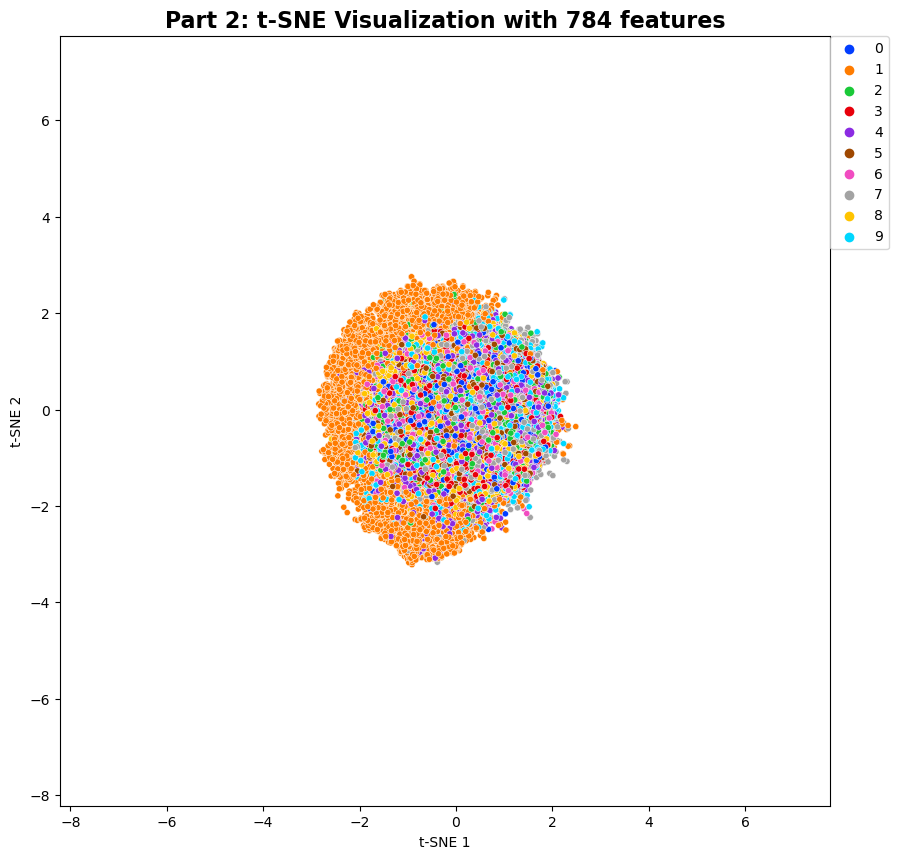

In [21]:
tsne_df2 = pd.DataFrame({"t-SNE 1":tsne_result2[:,0], "t-SNE 2":tsne_result2[:,1], "label":Y_df['labels']})
fig, ax = plt.subplots(1, figsize=(15,10))
sns.scatterplot(x = 't-SNE 1', y= 't-SNE 2', hue = 'label', data = tsne_df2, ax = ax, s=20, palette = 'bright')
# sns.color_palette('bright', 10)
lim = (tsne_result2.min()-5, tsne_result2.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.set_title('Part 2: t-SNE Visualization with 784 features', fontsize = 16, weight = 'bold')
ax.legend(bbox_to_anchor = (1,1), loc =2, borderaxespad = 0.0)

# vizualization using SDD

Same Degree Distribution (SDD) is dimentionality reduction approach that clusters non-linear data stuctures.<br>
SDD will try to determine which degree of distribution can best capture non-linear data.

In [ ]:
%matplotlib inline
from scipy import linalg
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.sparse import csr_matrix, issparse
from sklearn.neighbors import NearestNeighbors
from sklearn.base import BaseEstimator
from sklearn.utils import check_random_state
from sklearn.utils._openmp_helpers import _openmp_effective_n_threads
from sklearn.utils.validation import check_non_negative
from sklearn.utils.validation import _deprecate_positional_args
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances

MACHINE_EPSILON = np.finfo(np.double).eps

In [22]:
def _joint_probabilities(X, degrees_of_freedom):
    dist = pdist(X, "sqeuclidean")
    dist += 1.
    dist **= (-degrees_of_freedom)
    P= np.maximum(dist / ( np.sum(dist)), MACHINE_EPSILON)
    return P


def _kl_divergence(params, P, degrees_of_freedom, n_samples, n_components,
                  skip_num_points=0, compute_error=True):

    X_embedded = params.reshape(n_samples, n_components)
    dist = pdist(X_embedded, "sqeuclidean")
    Dist=dist+ 1.
    dist= Dist**(-degrees_of_freedom)
    Q = np.maximum(dist / (np.sum(dist)), MACHINE_EPSILON)
    dist1=Dist**(-1)
    kl_divergence =np.dot(P, np.log(np.maximum(P, MACHINE_EPSILON) / Q))
    grad = np.ndarray((n_samples, n_components), dtype=params.dtype)
    PQd = squareform((P - Q) * dist1)
    for i in range(skip_num_points, n_samples):
        grad[i] = np.dot(np.ravel(PQd[i]),
                        X_embedded[i] - X_embedded)
    grad = grad.ravel()
    c = 2*(degrees_of_freedom + 1.0) 
    grad *= c

    return kl_divergence, grad

def _gradient_descent(objective, p0, it, n_iter,
                     n_iter_check=1, n_iter_without_progress=300,
                     momentum=0.5, learning_rate=7, min_gain=0.01,
                     min_grad_norm=1e-7, verbose=0, args=None, kwargs=None):
    if args is None:
        args = []
    if kwargs is None:
        kwargs = {}

    p = p0.copy().ravel()
    update = np.zeros_like(p)
    gains = np.ones_like(p)
    error = np.finfo(np.float).max
    best_error = np.finfo(np.float).max
    best_iter = i = it

    tic = time.time()
    for i in range(it, n_iter):
        check_convergence = (i + 1) % n_iter_check == 0
       
        kwargs['compute_error'] = check_convergence or i == n_iter - 1

        error, grad = objective(p, *args, **kwargs)
        grad_norm = linalg.norm(grad)

        inc = update * grad < 0.0
        dec = np.invert(inc)
        gains[inc] += 0.2
        gains[dec] *= 0.8
        np.clip(gains, min_gain, np.inf, out=gains)
        grad *= gains
        update = momentum * update - learning_rate * grad
        p += update

        if check_convergence:
            toc = time.time()
            duration = toc - tic
            tic = toc

            if verbose >= 2:
                print("[t-SNE] Iteration %d: error = %.7f,"
                     " gradient norm = %.7f"
                     " (%s iterations in %0.3fs)"
                     % (i + 1, error, grad_norm, n_iter_check, duration))

            if error < best_error:
                best_error = error
                best_iter = i
            elif i - best_iter > n_iter_without_progress:
                if verbose >= 2:
                    print("[t-SNE] Iteration %d: did not make any progress "
                         "during the last %d episodes. Finished."
                         % (i + 1, n_iter_without_progress))
                break
            if grad_norm <= min_grad_norm:
                if verbose >= 2:
                    print("[t-SNE] Iteration %d: gradient norm %f. Finished."
                         % (i + 1, grad_norm))
                break

    return p, error, i


class SDD(BaseEstimator):
   
   
    _EXPLORATION_N_ITER = 300
    _N_ITER_CHECK =50
    def _fit(self, X, degrees_of_freedom, skip_num_points=0):
        random_state=None
        n_samples=X.shape[0]
        P = _joint_probabilities(X,degrees_of_freedom)

        random_state = check_random_state(random_state)

        X_embedded = 1e-4 * random_state.randn(
               n_samples, 2).astype(np.float32)

        return self._tsne(P, degrees_of_freedom, n_samples,X_embedded=X_embedded,skip_num_points=skip_num_points)
    
    def _tsne(self, P, degrees_of_freedom, n_samples, X_embedded, skip_num_points=0):
        """Runs t-SNE."""
        params = X_embedded.ravel()

        opt_args = {
           "it": 0,
           "n_iter_check": 50,
           "min_grad_norm": 1e-7,
           "learning_rate": 7,
           "verbose": 0,
           "kwargs": dict(skip_num_points=skip_num_points),
           "args": [P, degrees_of_freedom, n_samples, 2],
           "n_iter_without_progress": 300,
           "n_iter": 300,
           "momentum": 0.8,
       }
        obj_func = _kl_divergence

        params, kl_divergence, it = _gradient_descent(obj_func, params,
                                                     **opt_args)
        P /= 1
        remaining =2000 - 300
        if it < 300 or remaining > 0:
            opt_args['n_iter'] = 2000
            opt_args['it'] = it + 1
            opt_args['momentum'] = 0.8
            opt_args['n_iter_without_progress'] = 300
            params, kl_divergence, it = _gradient_descent(obj_func, params,
                                                         **opt_args)

        self.n_iter_ = it
        X_embedded = params.reshape(n_samples, 2)
        self.kl_divergence_ = kl_divergence

        return X_embedded


NameError: name 'BaseEstimator' is not defined